
# Grover Search and Long Algorithms Based on MindSpore Quantum

Translators: [unseenme](https://gitee.com/unseenme) and [Waikikilick](https://gitee.com/herunhong)

[![Download Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_notebook_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/en/case_library/mindspore_grover_search_algorithm.ipynb)&emsp;
[![Download Code](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_download_code_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/en/case_library/mindspore_grover_search_algorithm.py)&emsp;
[![View Source On Gitee](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source_en.svg)](https://gitee.com/mindspore/docs/blob/master/docs/mindquantum/docs/source_en/case_library/grover_search_algorithm.ipynb)

## Overview

If you have heard of quantum computing, you must have heard of the Grover search algorithm. In 1996, Lov Grover \[1\] proposed the Grover search algorithm, which is an algorithm that uses the superposition of quantum states to perform parallel computing and achieve acceleration. The Grover search algorithm is recognized as the second great quantum algorithm after Shor algorithm, and it is also the first quantum algorithm to be fully experimentally implemented, which solves the problem of unordered database search. In 1997, Bennett \[2\] et al. proved that for the unstructured quantum search problem, at least $\Omega(\sqrt{N})$ quantum queries are required, so the Grover search algorithm is the optimal algorithm in the asymptotic sense.

The Unordered Database Search problem is to find some elements that meet the requirements from an unordered database with a large number of elements. Since the number of elements in the database is huge and the elements are unordered, it is easy to verify that a given element satisfies the requirements, but conversely, it is not easy to find these elements.

To solve the unordered database search problem (it may be assumed that there is only one target search data), the time complexity required by the classical algorithm is $\mathcal{O}(N)$, while the time complexity required by the Grover search algorithm is only $\mathcal{O}(\sqrt{N})$, compared with the classical algorithm, it has a quadratic speedup, showing the powerful performance of quantum computing. In addition, the amplitude expansion technique used in Grover search algorithm can accelerate many heuristic classical search algorithms, so it has a wide range of applications.

This document will introduce the basic principles of Grover search algorithm, and show how to use MindSpore Quantum to implement the algorithm by two specific simple examples.

## Problem Description

We need to search in an unordered set of $N$ elements (database). Establish one-to-one correspondence between elements in the database and indexes (integers from $0$ to $N-1$), and we focus on searching the indices of these elements. Consider formulating this search problem as a function $f(x)$ over an input $x$, where $x$ is an integer between $0$ and $N-1$. Then, the function $f$ is defined as:

$$
\begin{equation}
f(x)=\begin{cases}0,x\neq x_{target}\\\\
1,x=x_{target}
\end{cases}
\end{equation}.
$$

Without loss of generality, assuming $N=2^n$, then in a quantum system, the index is in the quantum state $|0\rangle,|1\rangle,...,|N-1\rangle$ (or $|00...0\rangle,|00...1\rangle,...,|11...1\rangle$), that is, we can use $n$ qubits to store these indices.

At the same time, it is assumed that the search problem has only one target state $|\omega\rangle$. The goal of Grover search algorithm is to search for $|\omega\rangle$ with great probability.

## Fundamentals of Grover Search Algorithm

The basic principle of Grover search algorithm: First, a uniform superposition state is generated by the [Hadamard](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.HGate.html) gate, and then the Grover iteration (or $G$ operator) is repeatedly called to amplify the probability amplitude of the target item and suppress the probability amplitude of the non-target item (this method is called is the amplitude amplification), and finally the final state is measured, so that the target state $|\omega\rangle$ can be obtained with great probability.

The Grover search algorithm mainly includes the following steps:

### Step 1: Database Initialization

Perform the $H^{\otimes n}$ operation on $|0\rangle^{\otimes n}$, so that the database is initially in a uniform superposition state, that is

$$ |\psi_0\rangle=H^{\otimes n}|0\rangle^{\otimes n}=\frac{1}{\sqrt{N}}\sum_{i=0}^{N-1}|i\rangle. $$

### Step 2: Grover Iteration

Grover iteration can be further decomposed into four steps:

#### SubStep One

Execute the Oracle Operator $U_{\omega}$, and flip the phase of the target state $|\omega \rangle$.

In order to distinguish the data to be found from other data, the easiest way is to flip the phase of the target state (add a negative sign). At this time, we need to construct an Oracle operator $U_{\omega}$, which works as follows:

$$
\begin{equation}
U_{\omega}|x\rangle=\begin{cases}
&|x\rangle,x\neq \omega&\\\\
-&|x\rangle,x=\omega&
\end{cases}
\end{equation}.
$$

Since when $x=\omega$, $f(\omega)=1$, the effect of $U_{\omega}$ can also be expressed as:

$$ U_{\omega}|x\rangle=(-1)^{f(x)}|x\rangle, $$

Its matrix expression is

$$
\begin{equation}
U_{\omega}=
\left[
\begin{array}{ccc}
     (-1)^{f(0)} & 0           & \dots  & 0            \\\\
     0           & (-1)^{f(1)} & \dots  & 0            \\\\
     \vdots      & \vdots      & \ddots & \vdots       \\\\
     0           & 0           & \dots  & (-1)^{f(N-1)}
\end{array}
\right]
\end{equation}.
$$

#### SubStep Two

Perform $H^{\otimes n}$ operation.

Perform $H^{\otimes n}$ operation on $n$ qubits.

#### SubStep Three

Execute conditional phase shift operator $P$.

The conditional phase shift operator $P$ can flip the phase of each state except the $|0\rangle$ state, and its effect is as follows:

$$
\begin{equation}
P|x\rangle=\begin{cases}&|0\rangle,x= 0&\\\\
-&|x\rangle,x\neq0&
\end{cases}
\end{equation}.
$$

Its matrix expression is

$$
\begin{equation}
P = 2(|0\rangle\langle0|)^{\otimes n} - I_n =
\left[
\begin{array}{ccc}
     1      & 0      & \dots  & 0            \\\\
     0      & -1     & \dots  & 0            \\\\
     \vdots & \vdots & \ddots & \vdots       \\\\
     0      & 0      & \dots  & -1
\end{array}
\right]
\end{equation}.
$$

#### SubStep Four

Perform $H^{\otimes n}$ operation again.

So far, the complete $G$ operator can be expressed as

$$ G = H^{\otimes n} [2(|0\rangle\langle0|)^{\otimes n} - I_n] H^{\otimes n} U_{\omega}. $$

Note: The number of iterations required for the $G$ operator is

$$r = \left[ \frac{\pi}{4} \sqrt{\frac{N}{M}} \right] \sim O(\sqrt{N}),$$

where, $M$ represents the number of target states.

### Step 3: Measurement

By performing $\{|0\rangle,|1\rangle\}$ basis measurements on the final state, the target state $|\omega \rangle$ can be obtained with great probability.

The complete quantum circuit model of Grover search algorithm is shown below:

![grover algorithm circuit](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/docs/mindquantum/docs/source_en/images/grover_algorithm_circuit.png)

## Constructing a Unitary Operator that Flips the Phase of a Qubit

By the above introduction, we found that the most critical part of the Grover search algorithm is that there is a unitary operator that can flip the phase of the qubit, the Oracle operator $U_{\omega}$ can flip the phase of the target state, and the conditional phase shift operator $P$ can flip the phase of every state except $|0\rangle$ state.

Next, we will construct a unitary operator that can flip the phase of a qubit, defined as follows:

In [1]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import Z
def bitphaseflip_operator(phase_inversion_qubit, n_qubits):   # Define a function that flips the phase of a qubit
    s = [1 for i in range(1 << n_qubits)]
    for i in phase_inversion_qubit:
        s[i] = -1
    if s[0] == -1:
        for i in range(len(s)):
            s[i] = -1 * s[i]
    circuit = Circuit()
    length = len(s)
    cz = []
    for i in range(length):
        if s[i] == -1:
            cz.append([])
            current = i
            t = 0
            while current != 0:
                if (current & 1) == 1:
                    cz[-1].append(t)
                t += 1
                current = current >> 1
            for j in range(i + 1, length):
                if i & j == i:
                    s[j] = -1 * s[j]
    for i in cz:
        if i:
            if len(i) > 1:
                circuit += Z.on(i[-1], i[:-1])
            else:
                circuit += Z.on(i[0])

    return circuit

Now, the `bitphaseflip_operator()` function can flip the phase of a qubit, and users only need to input the target quantum state and the total number of qubits that need to flip the phase.

As an example, we now generate a uniform superposition of 3 qubits by running the following code:

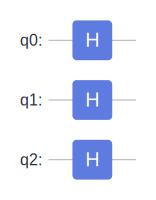

In [2]:
# pylint: disable=W0104
from mindquantum.core.circuit import UN
from mindquantum.core.gates import H
from mindquantum.simulator import Simulator

n_qubits = 3                                 # Set the number of qubits to 3
sim = Simulator('mqvector', n_qubits)        # Use the mqvector simulator, named sim

circuit = Circuit()                          # Initialize the quantum circuit, named circuit
circuit += UN(H, n_qubits)                   # H-gate operations are performed on each qubit

sim.apply_circuit(circuit)                   # Run the built quantum circuit circuit by the simulator sim

circuit.svg()                                # Print the quantum circuit circuit at this time                               # Print the quantum line circuit at this point

In [3]:
print(sim.get_qs(True))                      # Print the final state after running the quantum circuit circuit in the simulator sim

√2/4¦000⟩
√2/4¦001⟩
√2/4¦010⟩
√2/4¦011⟩
√2/4¦100⟩
√2/4¦101⟩
√2/4¦110⟩
√2/4¦111⟩


From the running results, we can see the quantum circuit at this time, and a uniform superposition state of 3 qubits has been generated successfully.

Suppose we need to flip the phase of the $|4\rangle$ state, just call the `bitphaseflip_operator()` function we defined and run the following code:

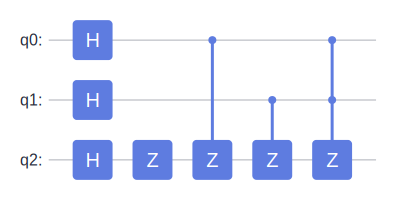

In [4]:
# pylint: disable=W0104
sim.reset()                                                      # Reset the quantum state maintained by the simulator sim so that the initialized quantum state is |000>

phase_inversion_qubit = [4]                                      # Invert the phase of the |4> state
operator = bitphaseflip_operator(phase_inversion_qubit, n_qubits)# Call our defined bitphaseflip_operator() function

circuit += operator                                              # Add the quantum gate required to flip the phase of the |4> state in the quantum circuit circuit

sim.apply_circuit(circuit)                                       # Run the built quantum circuit circuit again by the simulator sim

circuit.svg()                                                    # Print the quantum circuit circuit at this time

In [5]:
print(sim.get_qs(True))                                          # Print the final state after running the quantum circuit in the simulator sim

√2/4¦000⟩
√2/4¦001⟩
√2/4¦010⟩
√2/4¦011⟩
-√2/4¦100⟩
√2/4¦101⟩
√2/4¦110⟩
√2/4¦111⟩


From the running results, we can see that the quantum circuit at this time, and the phase of $|100\rangle$ is flipped to -1, run the following code:

In [6]:
print(int('100', 2))

4


It can be seen from the running results that the $|100\rangle$ state where the phase is flipped is the $|4\rangle$ state where we want the phase to flipped.

Assuming we need to flip the phase of every state except the $|0\rangle$ state, run the following code:

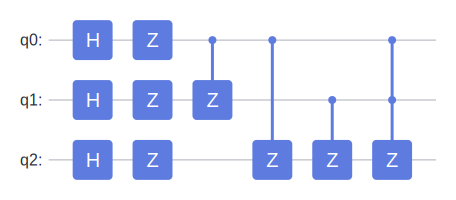

In [7]:
# pylint: disable=W0104
n_qubits = 3                                                     # Set the number of qubits to 3
sim1 = Simulator('mqvector', n_qubits)                           # Use the mqvector simulator, named sim1

operator1 = bitphaseflip_operator([i for i in range(1, pow(2, n_qubits))], n_qubits) # Call our defined bitphaseflip_operator() function to flip the phase of each state except |0> state, named operator1

circuit1 = Circuit()                                             # Initialize the quantum circuit, named circuit1
circuit1 += UN(H, n_qubits)                                      # H-gate operations are performed on each qubit
circuit1 += operator1                                            # Add the quantum gates required to flip the phase of each state except the |0> state in the quantum circuit circuit1

sim1.apply_circuit(circuit1)                                     # Run the built quantum circuit circuit1 by the simulator sim1

circuit1.svg()                                                   # Print the quantum circuit circuit1 at this time                                                   # Print the quantum line circuit at this point

In [8]:
print(sim1.get_qs(True))                                         # Print the final state after running the quantum circuit circuit1 in the simulator sim1

√2/4¦000⟩
-√2/4¦001⟩
-√2/4¦010⟩
-√2/4¦011⟩
-√2/4¦100⟩
-√2/4¦101⟩
-√2/4¦110⟩
-√2/4¦111⟩


From the running results, we can see the quantum circuit at this time, and we successfully flip the phase of every state except the $|0\rangle$ state.

That is to say, the function `bitphaseflip_operator()` we define can implement the Oracle operator $U_{\omega}$ and the conditional phase shift operator $P$ in the Grover search algorithm.

## Examples of Grover Search Algorithm Using MindSpore Quantum

### Example 1: $n=3$, $|\omega\rangle=|2\rangle$ (single target)

First, we need to define the $G$ operator and run the following code:

In [9]:
def G(phase_inversion_qubit, n_qubits):           # Define the G operator in Grover search algorithm
    operator = bitphaseflip_operator(phase_inversion_qubit, n_qubits)
    operator += UN(H, n_qubits)
    operator += bitphaseflip_operator([i for i in range(1, pow(2, n_qubits))], n_qubits)
    operator += UN(H, n_qubits)
    return operator

Then, we build the corresponding quantum circuit in MindSpore Quantum according to the quantum circuit model of Grover search algorithm:

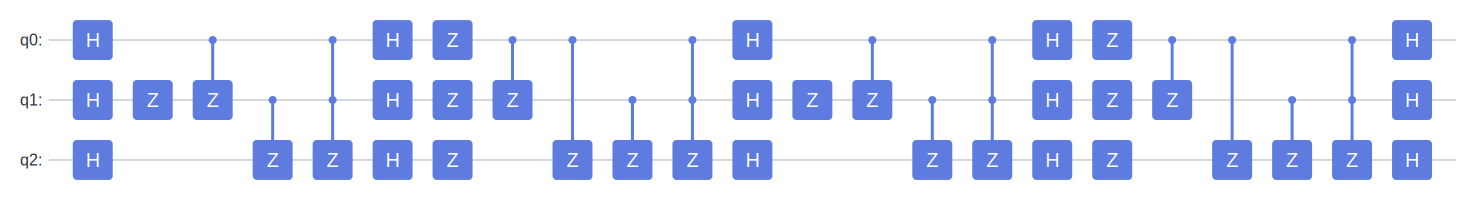

In [10]:
# pylint: disable=W0104
from numpy import pi, sqrt

n_qubits = 3                                      # Set the number of qubits to 3
phase_inversion_qubit = [2]                       # Set the target state that needs to flip the phase, and flip the phase of the |2> state here

N = 2 ** (n_qubits)                               # Calculate the total number of elements in the database
M = len(phase_inversion_qubit)                    # Calculate the total number of target states

r = int(pi / 4 * sqrt(N / M))                     # Set the number of iterations of the G operator to r

sim2 = Simulator('mqvector', n_qubits)            # Use the mqvector simulator, named sim2

circuit2 = Circuit()                              # Initialize the quantum circuit, named circuit2
circuit2 += UN(H, n_qubits)                       # H-gate operations are performed on each qubit

for i in range(r):                                # Execute the G operator r times in a loop
    circuit2 += G(phase_inversion_qubit, n_qubits)

sim2.apply_circuit(circuit2)                      # Run the built quantum circuit circuit2 by the simulator sim2

circuit2.svg()                                        # Print the quantum circuit circuit2 at this time

In [11]:
print(sim2.get_qs(True))                          # Print the final state after running the quantum circuit circuit2 in the simulator sim2

-√2/16¦000⟩
-√2/16¦001⟩
0.9722718241315036¦010⟩
-√2/16¦011⟩
-√2/16¦100⟩
-√2/16¦101⟩
-√2/16¦110⟩
-√2/16¦111⟩


From the results of the operation, we can see that the amplitude of the $|010\rangle$ state is 0.9722718241315036, which is a very large amplitude compared to other quantum states, that is to say, if we measure the state at this time, it will be with a great probability get the target state $|010\rangle$, run the following code to measure:

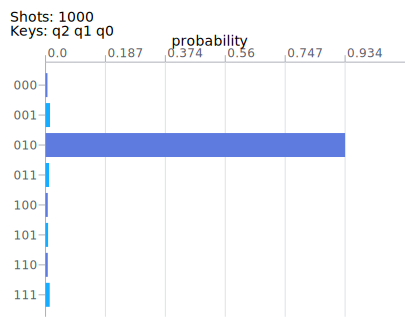

In [12]:
# pylint: disable=W0104
from mindquantum.core.gates import Measure

sim2.reset()                                      # Reset the quantum state maintained by the simulator sim2, so that the initialized quantum state is |000>

circuit2 += UN(Measure(), circuit2.n_qubits)      # Add a measurement gate to each qubit in the quantum circuit circuit2

result = sim2.sampling(circuit2, shots=1000)      # Sampling the quantum circuit circuit2 1000 times by the simulator sim2
result.svg()                                      # print sampling results

It can be seen from the running results that 934 of the 1000 samples have the sampling result of 010 (the sampling result may fluctuate randomly). Convert it to a decimal number and run the following code:

In [13]:
print(int('010', 2))

2


It can be seen from the running results that we successfully search for the $|2\rangle$ state.

### Example 2: $n=5$, $|\omega\rangle=|5\rangle$ and $|11\rangle$ (multi-target)

In Example 1, single-target search is implemented, and now we try to achieve multi-target search. First, the $G$ operator has been defined. We only need to set the number of qubits and the target state that needs to flip the phase, and then build the corresponding quantum circuit. Run the following code:

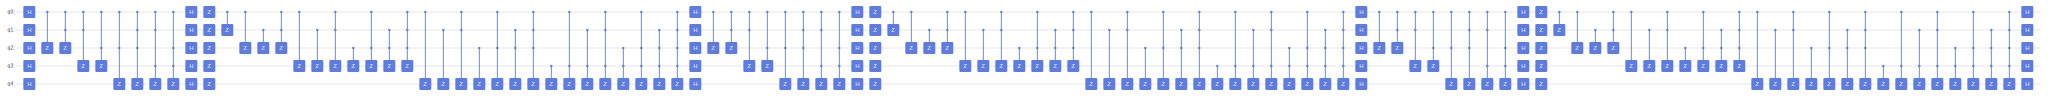

In [14]:
# pylint: disable=W0104
n_qubits = 5                                      # Set the number of qubits to 5
phase_inversion_qubit = [5, 11]                   # Set the target state to be phase-flipped, and flip the phases of the |5> state and |11> state here

N = 2 ** (n_qubits)                               # Calculate the total number of elements in the database
M = len(phase_inversion_qubit)                    # Calculate the total number of target states

r = int(pi / 4 * sqrt(N / M))                     # Set the number of iterations of the G operator to r

sim3 = Simulator('mqvector', n_qubits)            # Use the mqvector simulator, named sim3

circuit3 = Circuit()                              # Initialize the quantum circuit, named circuit3
circuit3 += UN(H, n_qubits)                       # H-gate operations are performed on each qubit

for i in range(r):                                # Execute the G operator r times in a loop
    circuit3 += G(phase_inversion_qubit, n_qubits)

sim3.apply_circuit(circuit3)                      # Run the built quantum circuit circuit3 by the simulator sim3

circuit3.svg()                                    # Print the quantum circuit circuit3 at this time

In [15]:
print(sim3.get_qs(True))                          # Print the final state after running the quantum circuit circuit3 in the simulator sim3

-0.035907766232129455¦00000⟩
-0.035907766232129365¦00001⟩
-0.03590776623212947¦00010⟩
-0.035907766232129254¦00011⟩
-0.03590776623212947¦00100⟩
0.6932961018664989¦00101⟩
-0.035907766232129455¦00110⟩
-0.035907766232129365¦00111⟩
-0.035907766232129455¦01000⟩
-0.035907766232129365¦01001⟩
-0.03590776623212947¦01010⟩
0.6932961018664989¦01011⟩
-0.03590776623212947¦01100⟩
-0.035907766232129254¦01101⟩
-0.035907766232129455¦01110⟩
-0.035907766232129365¦01111⟩
-0.0359077662321294¦10000⟩
-0.03590776623212939¦10001⟩
-0.03590776623212936¦10010⟩
-0.03590776623212949¦10011⟩
-0.03590776623212936¦10100⟩
-0.03590776623212949¦10101⟩
-0.0359077662321294¦10110⟩
-0.03590776623212939¦10111⟩
-0.0359077662321294¦11000⟩
-0.03590776623212939¦11001⟩
-0.03590776623212936¦11010⟩
-0.03590776623212949¦11011⟩
-0.03590776623212936¦11100⟩
-0.03590776623212949¦11101⟩
-0.0359077662321294¦11110⟩
-0.03590776623212939¦11111⟩


It can be seen from the running results that the amplitudes of the $|00101\rangle$ and $|01011\rangle$ states are both 0.6932961018664989, which are extremely large amplitudes compared to other quantum states, that is, if we measure the current state, the target states $|00101\rangle$ and $|01011\rangle$ states will be obtained with a great probability, run the following code to measure:

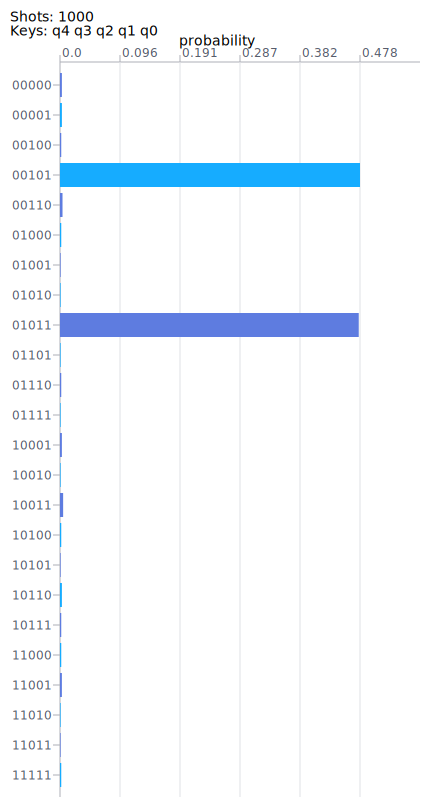

In [16]:
# pylint: disable=W0104
sim3.reset()                                      # Reset the quantum state maintained by the simulator sim3 so that the initialized quantum state is |00000>

circuit3 += UN(Measure(), circuit3.n_qubits)      # Add a measurement gate to each qubit in the quantum circuit circuit3

result1 = sim3.sampling(circuit3, shots=1000)     # The quantum circuit circuit3 is sampled 1000 times by the simulator sim3
result1.svg()                                     # print sampling results

It can be seen from the running results that 478 of the 1000 samplings have the sampling result of 00101 and 476 samplings have the result of 01011. Convert it to a decimal number and run the following code (The sampling results may fluctuate randomly):

In [17]:
print(int('00101', 2))
print(int('01011', 2))

5
11


It can be seen from the running results that we successfully search for the $|5\rangle$ and $|11\rangle$ states.

So far, we have introduced the basic principles of Grover search algorithm, and shown how to use MindSpore Quantum to implement the algorithm by two specific small examples! Hurry up and experience the fun of quantum programming!

## Long Algorithm

Except for the scenario of finding one data in a database of size 4, the Grover algorithm is not able to search the marked state precisely. Professor Guilu Long of Tsinghua University proposed the quantum exact search algorithm - Long algorithm \[3\] on the base of Grover's algorithm, which is able to search the target state in all scenarios with the accuracy of 1. The main idea is to rewrite the Grover operator as the follows,

$$L = -H^{\otimes n} R_0 H^{\otimes n} R_\tau,$$

where $R_0 = (I+(e^{i\theta}-1)\left|0\right>\left<0\right|)$, $R_\tau = (I+(e^{i\theta}-1)\left|\tau\right>\left<\tau\right|)$. When the phase matching condition is satisfied,

$$\theta = 2\arcsin\left(\sin\beta\sin\left(\frac{\pi}{4J_s+6}\right)\right)$$

To find the target state with probability 1, we only need to perform the Long operator $J_s+1$ times. Here $\beta=\arcsin{\sqrt{M/N}}$, $M$ is the number of labeled states, $N$ is the database size, and $J_s>=[((\pi/2)-\beta)/\beta]$. In the following, we use MindSpore Quantum to implement it.

### Quntum Circuit for General Angle Phase Rotation

With the aid of auxiliary bits, we build a quantum circuit for general angle phase rotation on a certain basis vector.

In [18]:
from mindquantum.core.gates import X, PhaseShift
from mindquantum.core.circuit import Circuit
def change_phase_with_anclia(which, n_qubits, phase):
    c = Circuit()
    which_bit = bin(which)[2:].zfill(n_qubits)[::-1]
    polarity_circ = Circuit()
    for idx, bit in enumerate(which_bit):
        if bit == "0":
            polarity_circ += X.on(idx)
    c += polarity_circ
    c += PhaseShift(phase).on(n_qubits, list(range(n_qubits)))
    c += polarity_circ
    return c

### Constructing the Long Operator

In [19]:
from mindquantum.core.gates import BARRIER, Z

def L(which, n_qubits, theta, phi):
    U = UN(H, n_qubits)
    R0 = change_phase_with_anclia(0, n_qubits, theta)
    R_t = change_phase_with_anclia(which, n_qubits, phi)
    g_ops = R_t + BARRIER + U + BARRIER + R0 + BARRIER + U + BARRIER
    g_ops += Z.on(n_qubits)
    return g_ops

## Performing the Quantum Exact Search Algorithm: Long Algorithm

Here we take the example of searching $\left|2\right>$ state in the 3-bit database to perform the Long algorithm.

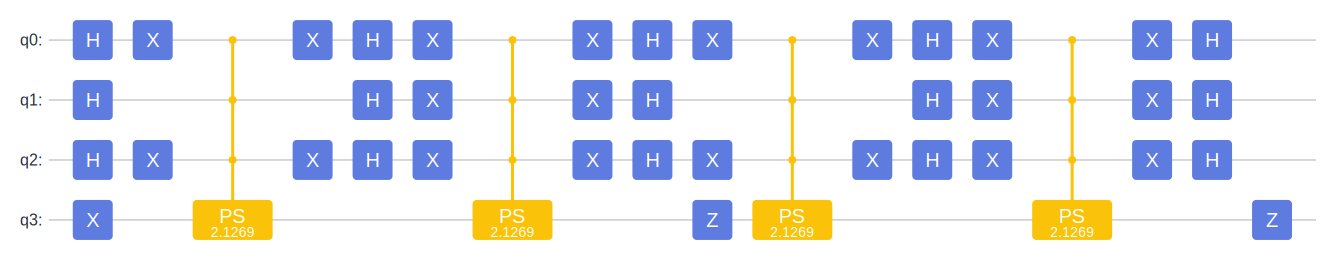

In [20]:
import numpy as np
from mindquantum.core.gates import H
from mindquantum.core.circuit import UN
n_qubits = 3
will_find = 2
beta = np.arcsin(np.sqrt(1 / 2**n_qubits))
Js = int((np.pi / 2 - beta) / 2 / beta)
theta = 2 * np.arcsin(np.sin(np.pi / (4 * Js + 6)) / np.sin(beta))
phi = theta

g = L(will_find, n_qubits, theta, phi)            # Constructing the Long operator for exact search

circ = UN(H, n_qubits) + X.on(n_qubits)
for i in range(Js + 1):
    circ += g
circ.svg()

Next, we calculate the quantum state of the circuit.

In [21]:
print(circ.get_qs(ket=True))

(0.048708136684586345-0.9988130542902997j)¦1010⟩


It is found that by removing the phase, we can get the target state exactly. By sampling, we can also obtain similar results as follows.

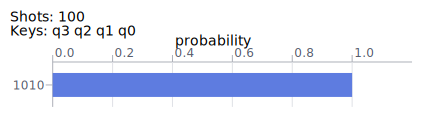

In [22]:
from mindquantum.simulator import Simulator
from mindquantum.core.gates import Measure

sim = Simulator('mqvector', circ.n_qubits)
res = sim.sampling(circ + UN(Measure(), circ.n_qubits), shots=100)
res.svg()

In [23]:
from mindquantum.utils.show_info import InfoTable

InfoTable('mindquantum', 'scipy', 'numpy')

Software,Version
mindquantum,0.9.11
scipy,1.10.1
numpy,1.23.5
System,Info
Python,3.9.16
OS,Linux x86_64
Memory,8.3 GB
CPU Max Thread,8
Date,Sat Dec 30 22:57:12 2023


### **References:**

\[1\] L. K. Grover, A fast quantum mechanical algorithm for database search\[C\]// Proceedings of the twenty-eighth annual ACM symposium on Theory of computing. ACM, 1996: 212-219.

\[2\] G. Brassard, P. Hoyer, M. Mosca, et al. Quantum amplitude amplification and estimation\[J\]. Contemporary Mathematics, 2002, 305: 53-74.

\[3\] Long G L. Grover algorithm with zero theoretical failure rate. Physical Rev A, 2001, 64: 022307.